In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob
import os
import plotly.express as px
warnings.filterwarnings('ignore')

In [2]:
listing_2406 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/listings_2406.csv')
listing_2407 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/listings_2407.csv')
listing_2408 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/listings_2408.csv')
listing_2409 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/listings_2409.csv')
listing_2410 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/listings_2410.csv')
listing_2411 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/listings_2411.csv')
listing_2412 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/listings_2412.csv')
listing_2501 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/listings_2501.csv')
listing_2502 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/listings_2502.csv')
listing_2503 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/listings_2503.csv')
listing_2504 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/listings_2504.csv')
listing_2505 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/listings_2505.csv')

In [3]:
calendar_2406 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/calendar_2406.csv')
calendar_2407 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/calendar_2407.csv')
calendar_2408 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/calendar_2408.csv')
calendar_2409 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/calendar_2409.csv')
calendar_2410 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/calendar_2410.csv')
calendar_2411 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/calendar_2411.csv')
calendar_2412 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/calendar_2412.csv')
calendar_2501 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/calendar_2501.csv')
calendar_2502 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/calendar_2502.csv')
calendar_2503 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/calendar_2503.csv')
calendar_2504 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/calendar_2504.csv')
calendar_2505 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/calendar_2505.csv')

In [4]:
neighbourhoods_2406 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/neighbourhoods_2406.csv')
neighbourhoods_2407 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/neighbourhoods_2407.csv')
neighbourhoods_2408 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/neighbourhoods_2408.csv')
neighbourhoods_2409 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/neighbourhoods_2409.csv')
neighbourhoods_2410 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/neighbourhoods_2410.csv')
neighbourhoods_2411 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/neighbourhoods_2411.csv')
neighbourhoods_2412 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/neighbourhoods_2412.csv')
neighbourhoods_2501 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/neighbourhoods_2501.csv')
neighbourhoods_2502 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/neighbourhoods_2502.csv')
neighbourhoods_2503 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/neighbourhoods_2503.csv')
neighbourhoods_2504 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/neighbourhoods_2504.csv')
neighbourhoods_2505 = pd.read_csv('C:/Users/q/Desktop/James/Schulich/Data Science/Airbnb/data/neighbourhoods_2505.csv')

In [5]:
folder_path = r"C:\Users\q\Desktop\James\Schulich\Data Science\Airbnb\data"
file_paths = sorted(glob.glob(os.path.join(folder_path, "listings_*.csv")))

In [6]:
month_labels = []
listing_counts = []
median_prices = []
price_distributions = {}  # 备用画 boxplot

In [7]:
for file in file_paths:
    filename = os.path.basename(file)
    ym = filename.split("_")[1].replace(".csv", "")
    year = "20" + ym[:2]
    month = ym[2:]
    label = f"{year}-{month}"
    month_labels.append(label)

    try:
        df = pd.read_csv(file)

        # 统计 listing 数量
        listing_counts.append(df['id'].nunique())

        # 价格转换
        if 'price' in df.columns:
            df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True), errors='coerce')
            med_price = df['price'].mean()
            median_prices.append(med_price)
            price_distributions[label] = df['price'].dropna()
        else:
            median_prices.append(None)
            price_distributions[label] = pd.Series()
        
        print(f"{label} 处理成功")
    except Exception as e:
        print(f"{label} 读取失败：{e}")
        listing_counts.append(None)
        median_prices.append(None)


2024-06 处理成功
2024-07 处理成功
2024-08 处理成功
2024-09 处理成功
2024-10 处理成功
2024-11 处理成功
2024-12 处理成功
2025-01 处理成功
2025-02 处理成功
2025-03 处理成功
2025-04 处理成功
2025-05 处理成功


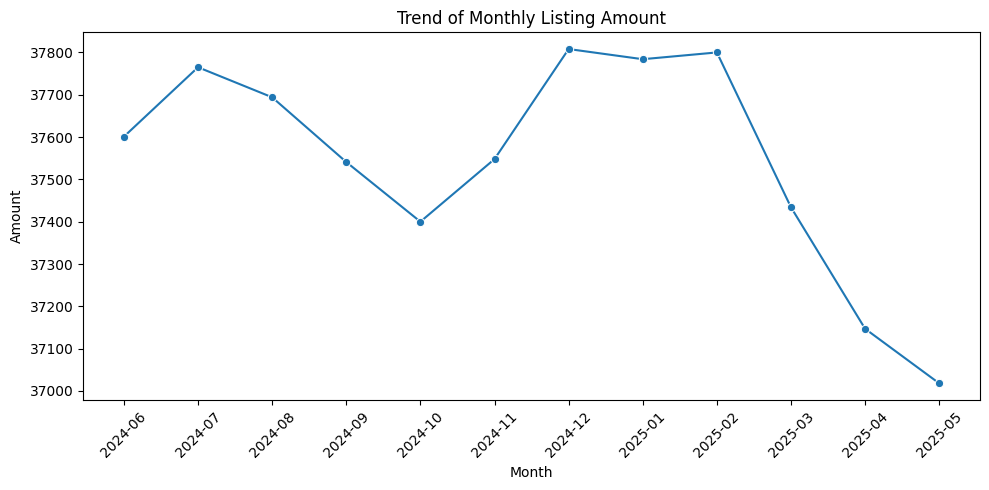

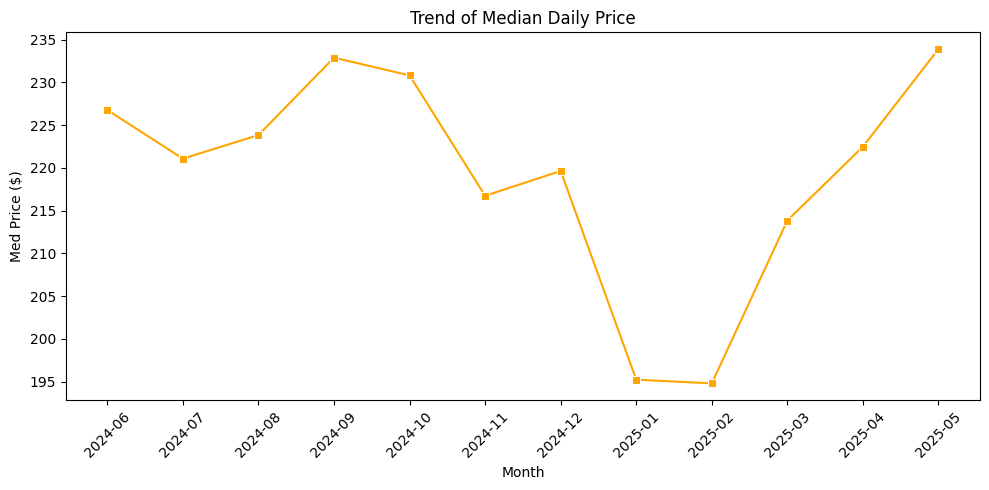

In [8]:
# 1. Listing 数量趋势图
plt.figure(figsize=(10,5))
sns.lineplot(x=month_labels, y=listing_counts, marker='o')
plt.title("Trend of Monthly Listing Amount")
plt.ylabel("Amount")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. 中位数价格趋势图
plt.figure(figsize=(10,5))
sns.lineplot(x=month_labels, y=median_prices, marker='s', color='orange')
plt.title("Trend of Median Daily Price")
plt.ylabel("Med Price ($)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

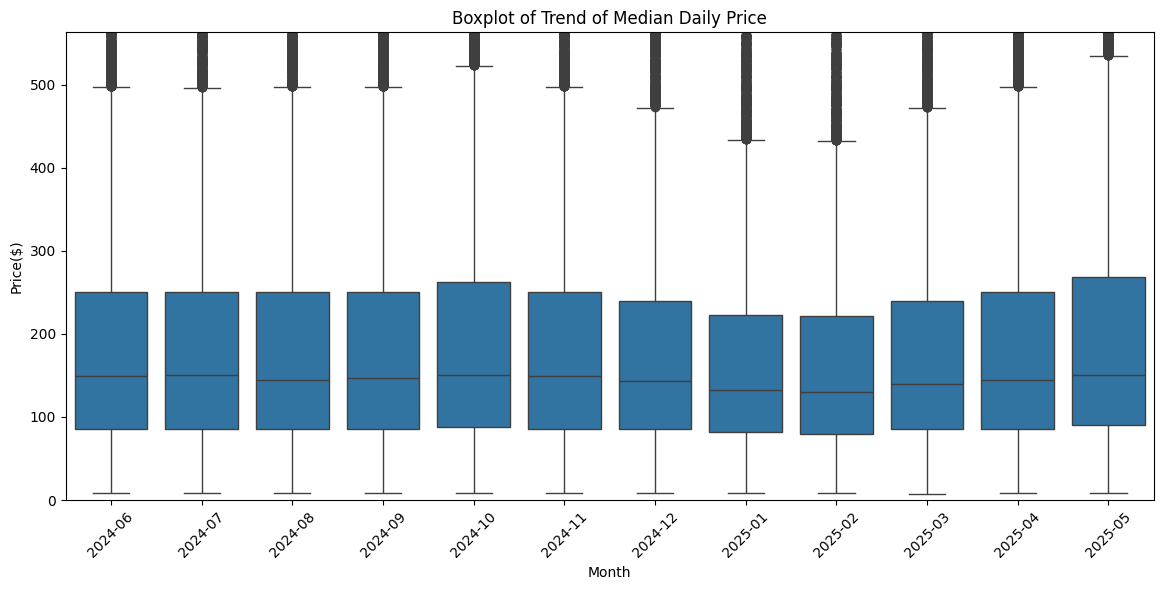

In [9]:
# 整理成 DataFrame
price_box_df = pd.DataFrame([(month, price) for month, series in price_distributions.items() for price in series],
                            columns=["month", "price"])

plt.figure(figsize=(12,6))
sns.boxplot(data=price_box_df, x="month", y="price")
plt.xticks(rotation=45)
plt.title("Boxplot of Trend of Median Daily Price")
plt.ylabel("Price($)")
plt.xlabel("Month")
plt.tight_layout()
plt.ylim(0, price_box_df['price'].quantile(0.95))  # 避免极端值压缩图像
plt.show()

In [10]:
def clean_and_aggregate(file_path, month_str):
    df = pd.read_csv(file_path)

    # 清理 price
    if 'price' in df.columns:
        df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True), errors='coerce')

    # 仅保留需要栏位并去除缺失
    df = df[['room_type', 'price']].dropna()

    # 分组统计
    summary = df.groupby('room_type').agg(
        count=('room_type', 'size'),
        avg_price=('price', 'mean')
    ).reset_index()

    summary['month'] = month_str
    return summary


In [11]:
# 总表
summary_list = []

# 处理每一个档案
for file in file_paths:
    # 取得月份标签（例如：2406）
    month_str = os.path.basename(file).split('_')[1].split('.')[0]
    summary_df = clean_and_aggregate(file, month_str)
    summary_list.append(summary_df)

# 合并所有月份
full_summary = pd.concat(summary_list, ignore_index=True)


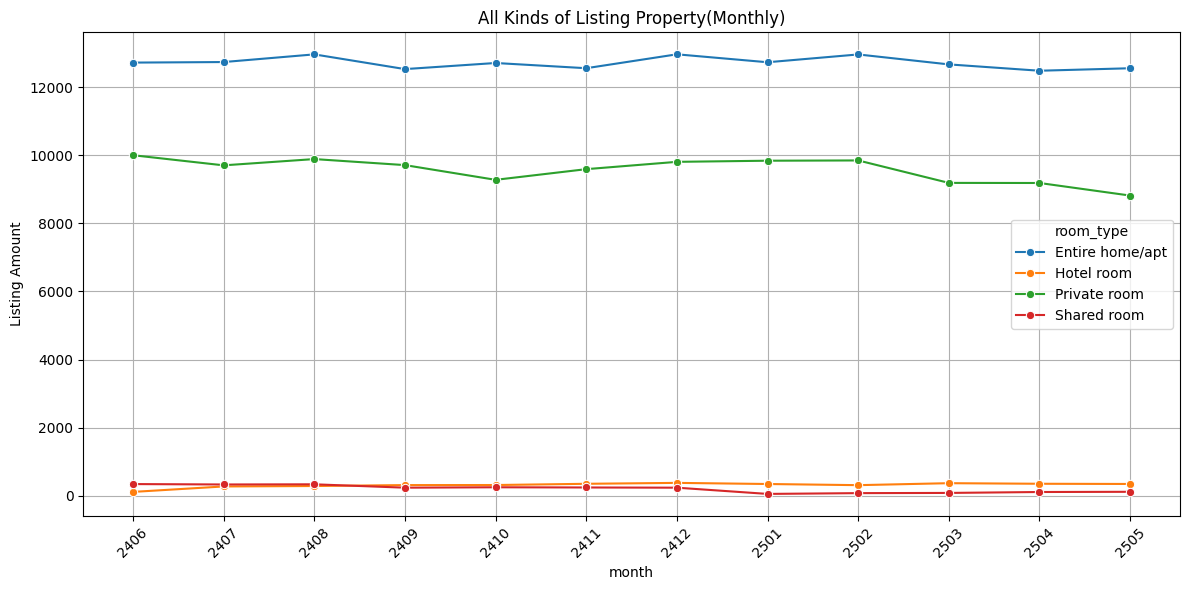

In [12]:
# 图一：数量趋势
plt.figure(figsize=(12,6))
sns.lineplot(
    data=full_summary,
    x='month',
    y='count',
    hue='room_type',
    marker='o'
)
plt.title("All Kinds of Listing Property(Monthly)")
plt.ylabel("Listing Amount")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

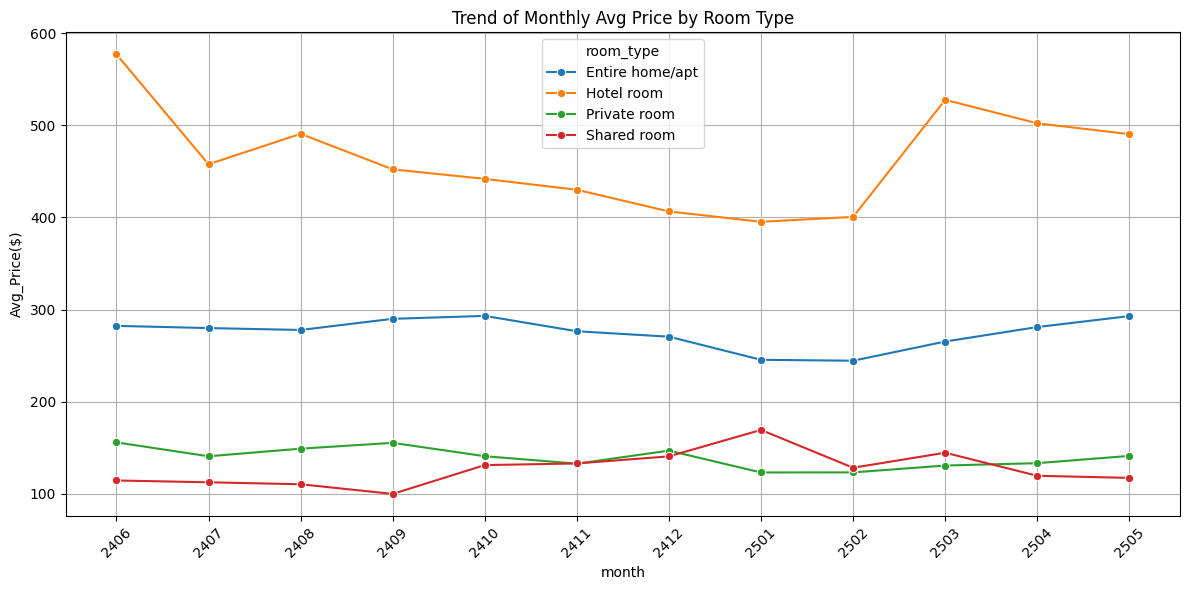

In [13]:
# 图二：平均价格趋势
plt.figure(figsize=(12,6))
sns.lineplot(
    data=full_summary,
    x='month',
    y='avg_price',
    hue='room_type',
    marker='o'
)
plt.title("Trend of Monthly Avg Price by Room Type")
plt.ylabel("Avg_Price($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
def aggregate_minimum_nights(file_path, month_str):
    df = pd.read_csv(file_path)

    # 仅保留需要栏位
    df = df[['room_type', 'minimum_nights']].dropna()

    # 转为数值型
    df['minimum_nights'] = pd.to_numeric(df['minimum_nights'], errors='coerce')

    # 筛选出大于等于 30 天
    df = df[df['minimum_nights'] >= 30]

    # 分组平均
    summary = df.groupby('room_type').agg(
        avg_min_nights=('minimum_nights', 'mean')
    ).reset_index()

    summary['month'] = month_str
    return summary


In [23]:
# 存放 minimum_nights 分析结果
min_night_list = []

# 处理每一个月
for file in file_paths:
    month_str = os.path.basename(file).split('_')[1].split('.')[0]
    min_summary_df = aggregate_minimum_nights(file, month_str)
    min_night_list.append(min_summary_df)

# 合并结果
min_nights_summary = pd.concat(min_night_list, ignore_index=True)


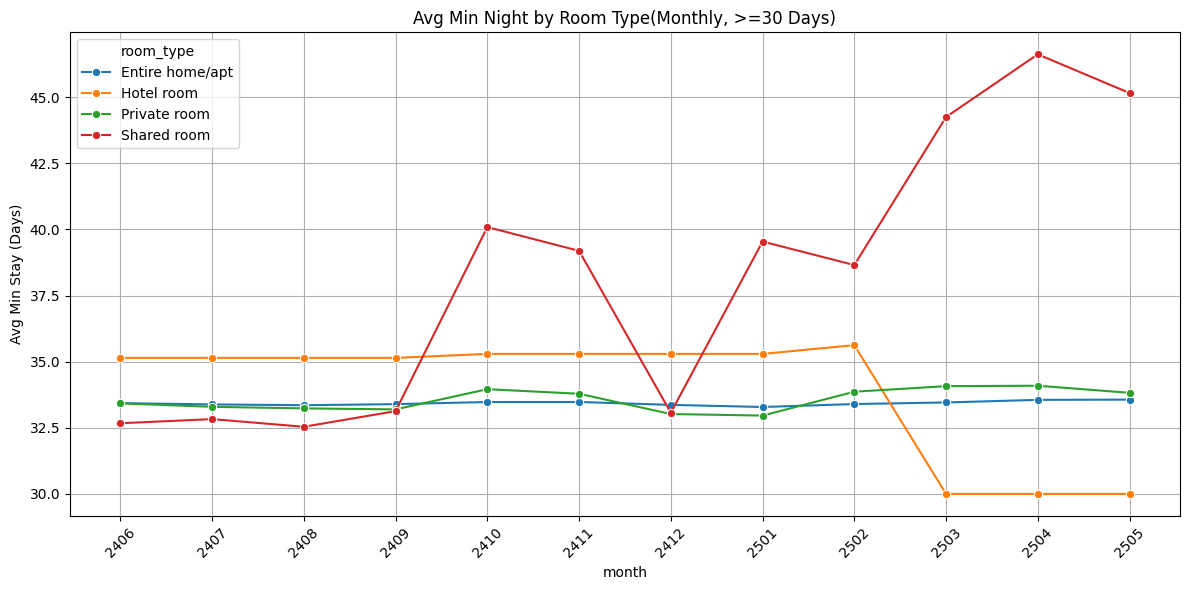

In [25]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=min_nights_summary,
    x='month',
    y='avg_min_nights',
    hue='room_type',
    marker='o'
)
plt.title("Avg Min Night by Room Type(Monthly, >=30 Days)")
plt.ylabel("Avg Min Stay (Days)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
def analyze_shared_room_long_stay(file_path, month_str):
    df = pd.read_csv(file_path)

    # 只保留我们要的栏位
    df = df[['room_type', 'minimum_nights', 'price']].dropna()

    # 保留 Shared room 且 minimum_nights > 30
    df = df[(df['room_type'] == 'Shared room') & (df['minimum_nights'] > 30)]

    # 清理价格
    df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True), errors='coerce')
    df['minimum_nights'] = pd.to_numeric(df['minimum_nights'], errors='coerce')

    df['month'] = month_str
    return df


In [27]:
shared_room_long_list = []

for file in file_paths:
    month_str = os.path.basename(file).split('_')[1].split('.')[0]
    shared_df = analyze_shared_room_long_stay(file, month_str)
    shared_room_long_list.append(shared_df)

# 合并所有月份
shared_long_stays = pd.concat(shared_room_long_list, ignore_index=True)


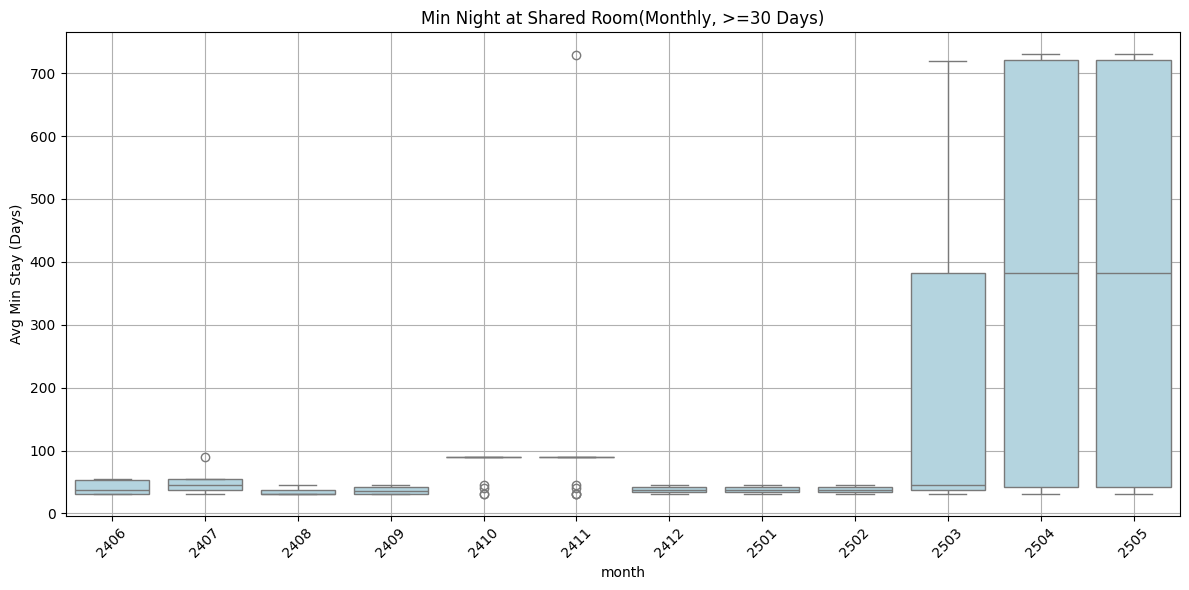

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=shared_long_stays,
    x='month',
    y='minimum_nights',
    color='lightblue'
)
plt.title("Min Night at Shared Room(Monthly, >=30 Days)")
plt.ylabel("Avg Min Stay (Days)")
plt.xlabel("month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


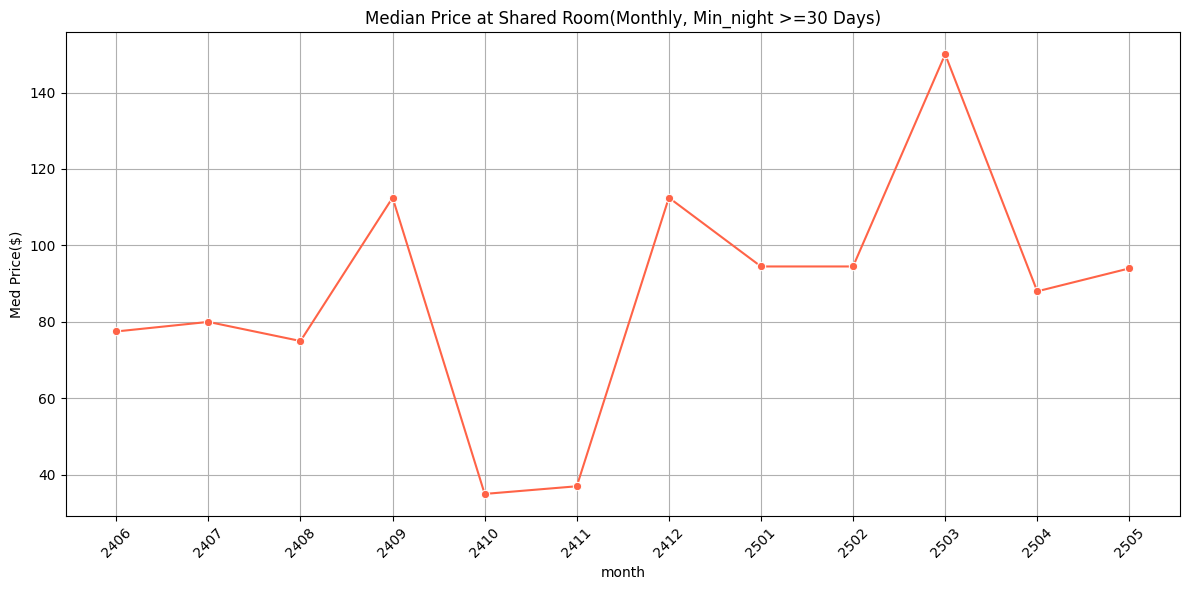

In [30]:
# 计算每月中位数价格
median_price_by_month = (
    shared_long_stays
    .groupby('month')['price']
    .median()
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.lineplot(
    data=median_price_by_month,
    x='month',
    y='price',
    marker='o',
    color='tomato'
)
plt.title("Median Price at Shared Room(Monthly, Min_night >=30 Days)")
plt.ylabel("Med Price($)")
plt.xlabel("month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
def load_shared_room_longstay(file_path, month_str):
    df = pd.read_csv(file_path)
    df = df[['room_type', 'minimum_nights', 'price', 'neighbourhood_group_cleansed']].dropna()

    # 只保留 Shared room 且住宿天数 >= 30 天
    df = df[(df['room_type'] == 'Shared room') & (df['minimum_nights'] >= 30)]

    # 清理数据格式
    df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True), errors='coerce')
    df['minimum_nights'] = pd.to_numeric(df['minimum_nights'], errors='coerce')

    # 加入月份与城市
    df['month'] = month_str
    df['city'] = df['neighbourhood_group_cleansed']  # 简化城市分析
    return df

# 所有 csv 路径
folder_path = r"C:\Users\q\Desktop\James\Schulich\Data Science\Airbnb\data"
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.startswith("listings_")]

all_data = []

for path in sorted(file_paths):
    month_code = os.path.basename(path).split('_')[1].split('.')[0]
    df_month = load_shared_room_longstay(path, month_code)
    all_data.append(df_month)

shared_long_stays = pd.concat(all_data, ignore_index=True)

In [33]:
listing_count = shared_long_stays.groupby('month').size().reset_index(name='shared_room_count')

In [34]:
median_price = (
    shared_long_stays
    .groupby(['month', 'city'])['price']
    .median().reset_index()
)

In [36]:
# 1. Shared room 数量变化
fig1 = px.line(listing_count, x='month', y='shared_room_count',
               title='Monthly Listing Amount of Long Stay Shared Room')
# 4. 城市 vs 中位数价格
fig2 = px.line(median_price, x='month', y='price', color='city',
               title='Median Price Trend of Long Stay Shared Room by City')

# 展示所有图
fig1.show()
fig2.show()


In [40]:
folder_path = r"C:\Users\q\Desktop\James\Schulich\Data Science\Airbnb\data"
months = [f"listings_24{m:02d}" for m in range(6, 13)] + [f"listings_25{m:02d}" for m in range(1, 6+1)]

# 用于存储筛选后的结果
filtered_data = []

for month in months:
    file_path = os.path.join(folder_path, f"{month}.csv")
    try:
        df = pd.read_csv(file_path, low_memory=False)

        # 添加月份标签
        df["month"] = month

        # 保证必要栏位存在（列名可能大小写敏感，请先确认）
        if "room_type" in df.columns and "minimum_nights" in df.columns:
            # 筛选条件
            condition = (
                (df["room_type"] == "Shared room") &
                (df["minimum_nights"] < 30)
            )
            df_filtered = df[condition].copy()
            filtered_data.append(df_filtered)
    except Exception as e:
        print(f"{month} 无法读取：{e}")

listings_2506 无法读取：[Errno 2] No such file or directory: 'C:\\Users\\q\\Desktop\\James\\Schulich\\Data Science\\Airbnb\\data\\listings_2506.csv'


In [44]:
shared_longstay = pd.concat(filtered_data, ignore_index=True)

# 检查结果
print(f"总共筛选出 {len(shared_longstay)} 笔 Shared room 资料（30天以内）")

总共筛选出 428 笔 Shared room 资料（30天以内）


In [43]:
count_by_month = shared_longstay.groupby("month").size().reset_index(name="shared_longstay_count")

fig1 = px.line(count_by_month, x="month", y="shared_longstay_count",
               title="Shared Room (min_night<30天) Trend of Listing Amount",
               markers=True)
fig1.show()